# Notas y ejercicios

Esta libreta de ejercicios "Jupyter" es un entorno de prácticas en inferencia estadística.

Utiliza la extensión de Python para matemáticas "SageMath".
disponible tanto para los sistemas operativos Windows y Linux. SageMath es un sistema de software de matemáticas libre y de código abierto, bajo licencia GPL. Está construido sobre muchos paquetes disponibles de código abierto como:
**NumPy, SciPy, matplotlib, Sympy, Maxima, GAP, FLINT, R, Octave** y muchos más, con Python como lenguaje de programación común.

Guías en español para aprender a usar SageMath:

1. *Sage para Estudiantes de Pregrado*, Gregory Bard

2. https://doc.sagemath.org/html/es/a_tour_of_sage/

3. https://doc.sagemath.org/html/es/tutorial/
    

In [70]:
load("statinf_sage8.sage")
ces = Estadin()

La línea anterior importa un módulo que contiene una clase con funciones útiles para los ejercicios. El texto del fuente "statinf.sage" es tanto documentación como calculadora gráfica para los ejercicios.

## Ejemplos de cuantiles y probabilidad acumulada 

In [71]:
# Obtener la probabilidad acumulada para el cuantil 2.0
# Usar la clase 'Estadin'
print(ces.pnorm(2.0))
print(ces.qnorm(0.97725))

0.9772498680518208
2.0000024438996027


### Comandos de R

Es posible ejecutar líneas para el intérprete R desde sage,
con el prefijo %r al principio de la línea, o como métodos tipo r.pnorm:

In [72]:
# Usar R
print(r.pnorm(2.0, 0, 1))
print(r.qnorm(0.97725,0,1))

[1] 0.9772499
[1] 2.000002


In [73]:
%r print(pnorm(1.5,0,1))
%r qnorm(0.9331928,0,1)

[1]
 0.9331928




[1] 1.5

In [74]:
pn01 = r.pnorm(2,0,1)
pt01 = r.pt(2,df=4)
qt01 = r.qt(0.942,df=4)
print(pn01, pt01, qt01)
%r xv <- c(1,2,3,4)
%r xv <- c(xv,5)
%r print(xv)


[1] 0.9772499 [1] 0.9419417 [1] 2.000879
[1]
 1
 2
 3
 4
 5




[1] 1 2 3 4 5

In [75]:
%r cat("The zero occurs at", 2*pi, "radians.", "\n")

The zero occurs at
 
6.283185
 
radians.
 




NULL

In [76]:
%r for (x in c(2:4)) print(sqrt(x))

[1]
 1.414214


[1]
 1.732051


[1]
 2




NULL

In [77]:
%r miabs <- function(n) { if (n > 0) {x <- n} else {x <- -n}}
%r miabs(-27)

%r rep("A", 10)

%r matrix(c(1,2,3,11,12,13), nrow=2, ncol=3, byrow=TRUE)

%r matrix(c(1,2,3,11,12,13), nrow=2, ncol=3, byrow=TRUE, dimnames=list(c("row1", "row2"), c("C.1", "C.2", "C.3")))


%r A <- matrix(c(1,2,3,11,12,13), nrow=2, ncol=3, byrow=TRUE)
%r rownames(A) <- c("row1","row2")
%r colnames(A) <- c("C.1", "C.2", "C.3")
%r A

     C.1 C.2 C.3
row1   1   2   3
row2  11  12  13

In [78]:
%r a <- 0
%r b <- 1
%r x <- c()
%r print(a)
%r while (b < 10) { print(b); temp <- a + b; a <- b; b <- temp;}
%r while (b < 10) { x <- c(x,b); temp <- a + b; a <- b; b <- temp;}
print(_sage_(x))

[1]
 0


[1]
 1


[1]
 1


[1]
 2


[1]
 3


[1]
 5


[1]
 8




NameError: name '_sage_' is not defined

In [79]:
%r Fibonacci <- function(n) { x <- c(0,1); while (length(x) < n) { position <- length(x); new <- x[position] + x[position-1]; x <- c(x,new) }; return(x) }
%r Fibonacci(9)

[1]  0  1  1  2  3  5  8 13 21

In [11]:
# Ayuda
help(sqrt)

Help on function sqrt in module sage.functions.other:

sqrt(x, *args, **kwds)
    INPUT:
    
    -  ``x`` - a number
    
    -  ``prec`` - integer (default: None): if None, returns
       an exact square root; otherwise returns a numerical square root if
       necessary, to the given bits of precision.
    
    -  ``extend`` - bool (default: True); this is a place
       holder, and is always ignored or passed to the sqrt function for x,
       since in the symbolic ring everything has a square root.
    
    -  ``all`` - bool (default: False); if True, return all
       square roots of self, instead of just one.
    
    EXAMPLES::
    
        sage: sqrt(-1)
        I
        sage: sqrt(2)
        sqrt(2)
        sage: sqrt(2)^2
        2
        sage: sqrt(4)
        2
        sage: sqrt(4,all=True)
        [2, -2]
        sage: sqrt(x^2)
        sqrt(x^2)
    
    For a non-symbolic square root, there are a few options.
    The best is to numerically approximate afterward::
    

0.9772498680518208
2.0000024438996027


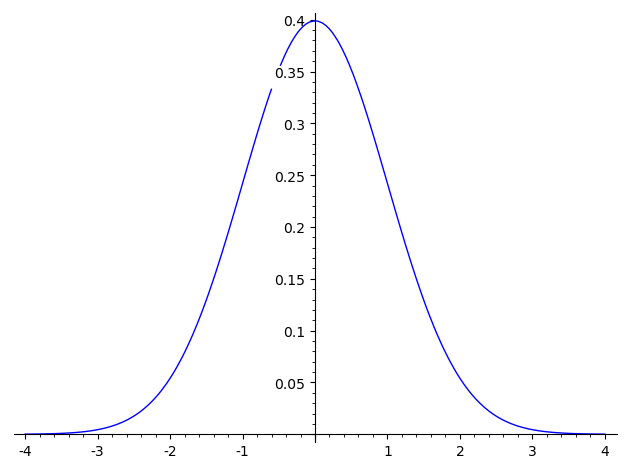

In [12]:
# Usar sage directamente
N = RealDistribution('gaussian', 1)
print(N.cum_distribution_function(2))
print(N.cum_distribution_function_inv(0.97725))
N.plot(xmin=-4, xmax=4)

### Función distribución normal con centro distinto de cero

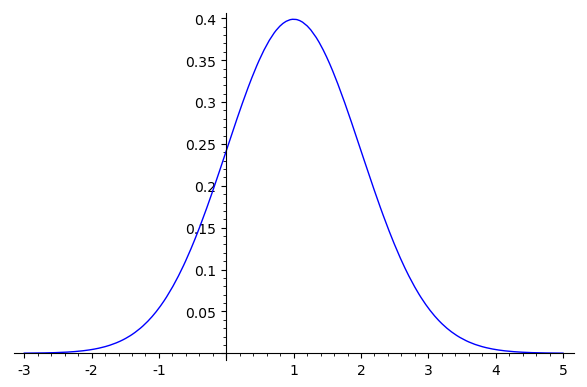

In [13]:
def gen_nd(mu,sigma):
    N = RealDistribution('gaussian', sigma)
    f = lambda x:N.distribution_function(x-mu)
    return f
f2 = gen_nd(1, 1)
shndmu = plot(f2, (x,-3,5))
show(shndmu)

## Ejemplos de confianza, cuantiles y gráficas

In [14]:
a=0.999
p = (a+1)/2
z = r.qnorm(p, 0, 1)
z

[1] 3.290527

In [15]:
rs = r.summary(r.c(1,4,3,4,3,2,5,1))
rs

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.750   3.000   2.875   4.000   5.000

0.97725


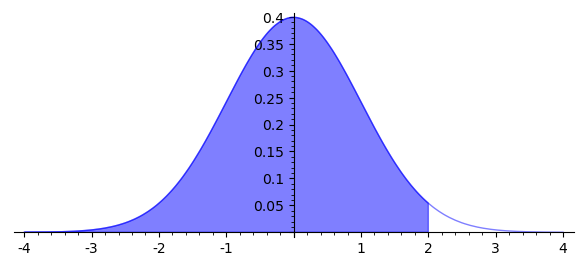

In [16]:
z = 2
p = ces.pnorm(z)
print(p.n(digits=5))
ces.dibujar_densidad(zi=-4,zf=z, rgbcolor='blue')

Como el total del área debe ser la probabilidad 1, el área después del cuantil es:
(1 - el área anterior a este).

0.465


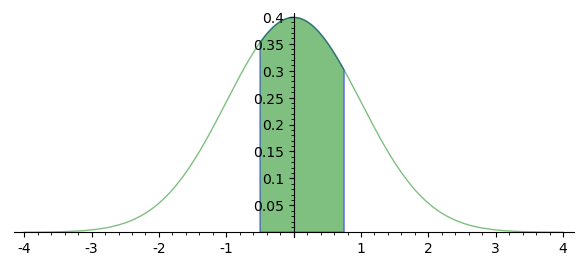

In [17]:
z1, z2 = -0.5, 0.75
p3 = ces.pnorm(z2) - ces.pnorm(z1)
print(p3.n(digits=3))
fcolor = 'green'
ces.dibujar_densidad(r=4,zi=z1,zf= z2, rgbcolor=fcolor)

In [18]:
z1, z2 = -0.5, 1.5
p3 = ces.pnorm(z2) - ces.pnorm(z1)
print(p3.n(digits=3))
fcolor = 'red'
plot3 = ces.dibujar_densidad(r=4,zi=z1,zf= z2, rgbcolor=fcolor)

0.625


In [19]:
z1, z2 = -0.5, 0
p1 = ces.pnorm(z2) - ces.pnorm(z1)
print(p1.n(digits=3))
plot1 = ces.dibujar_densidad(r=4,zi=z1,zf= z2, rgbcolor=fcolor)

0.191


In [20]:
z1, z2 = 0, 1.5
p2 = ces.pnorm(z2) - ces.pnorm(z1)
print(p2.n(digits=3))
plot2 = ces.dibujar_densidad(r=4,zi=z1,zf= z2, rgbcolor=fcolor)

0.433


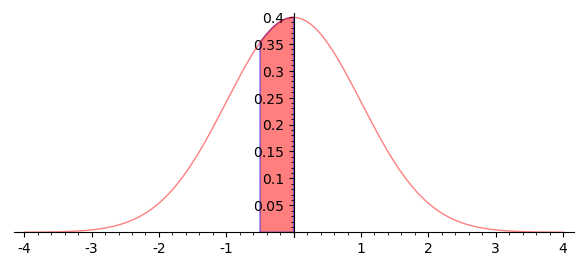

0.191


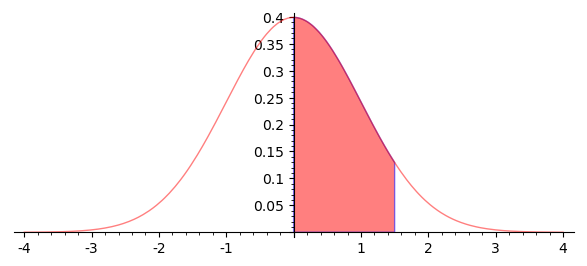

0.433


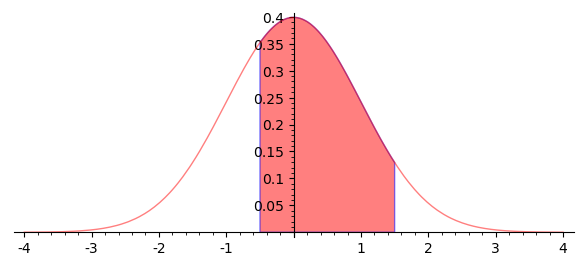

0.625


In [21]:
show(plot1)
print(p1.n(digits=3))
show(plot2)
print(p2.n(digits=3))
show(plot3)
print(p3.n(digits=3))

El área sobre el intervalo, es la diferencia del área del cuantil mayor menos el área del cuantil menor. 

0.890


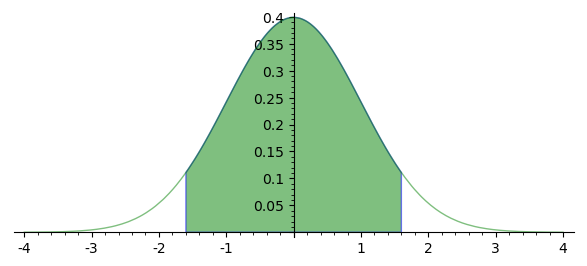

In [22]:
z1, z2 = -1.6, 1.6
p = ces.pnorm(z2) - ces.pnorm(z1)
print(p.n(digits=3))
ces.dibujar_densidad(r=4,zi=z1,zf=z2, rgbcolor='green')

0.110


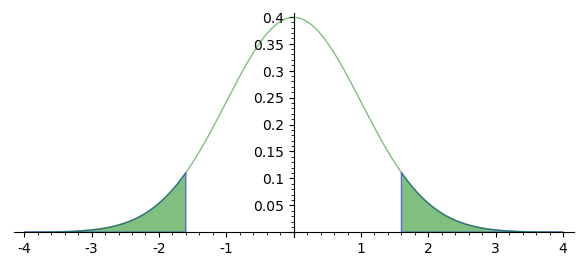

In [23]:
z1, z2 = -1.6, 1.6
p = 1 - (ces.pnorm(z2) - ces.pnorm(z1))
print(p.n(digits=3))
ces.dibujar_densidad(r=4,zi=z1,zf=z2, rgbcolor='green',complemento=True)

0.0548


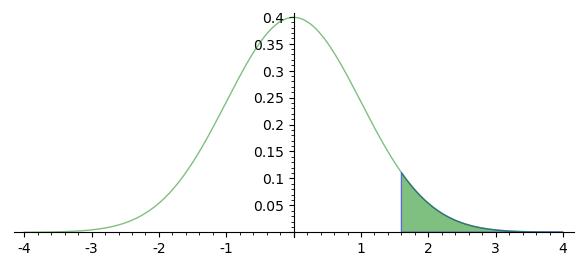

In [24]:
z1 = 1.6
p = 1 - ces.pnorm(z1)
print(p.n(digits=3))
ces.dibujar_densidad(r=4,zi=z1,zf=4, rgbcolor='green')

Si el intervalo es simétrico, el área anterior al cuantil menor es igual al área posterior al cuantil mayor. 

Y también debido a la simetría, el área anterior a $0$ es $1/2$.

Si llamamos confianza a la probabilidad sobre el intervalo, y radio de confianza a su cuantil superior:

1. El área anterior al cuantil superior (radio del intervalo de confianza), es $1/2$.

2.  El área anterior al cuantil superior es $1/2$ más la mitad de la confianza.

Entonces, dada la confianza, el radio de confianza se obtiene como el cuantil de $1/2$ más la mitad del valor de la confianza.


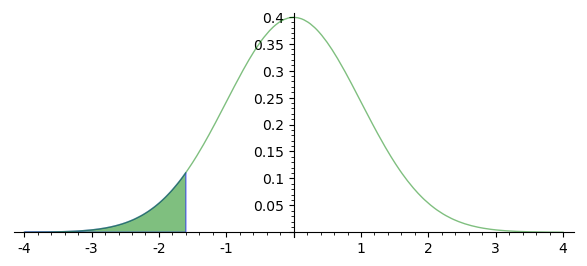

In [25]:
ces.dibujar_densidad(r=4,zi=-4,zf=-1.6, rgbcolor='green')

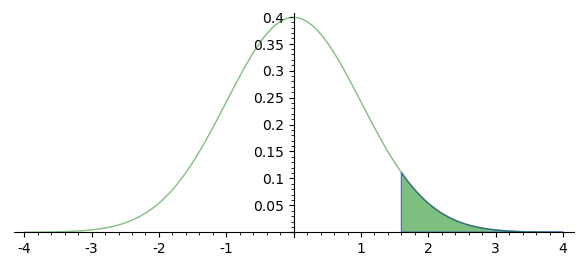

In [26]:
ces.dibujar_densidad(r=4,zi=1.6,zf=4, rgbcolor='green')

In [27]:
lista_de_probabilidades_acumuladas = [0.05, 0.5, 0.95]
for p in lista_de_probabilidades_acumuladas:
    mostrar_decimal(p, 'probabilidad: ')

probabilidad: 0.050
probabilidad: 0.500
probabilidad: 0.950


In [28]:
lista_de_cuantiles = [ces.qnorm(p) 
for p in lista_de_probabilidades_acumuladas]

for z in lista_de_cuantiles:
    mostrar_decimal(z, 'cuantil: ')

cuantil: -1.645
cuantil: 0.000
cuantil: 1.645


1.64485362695147


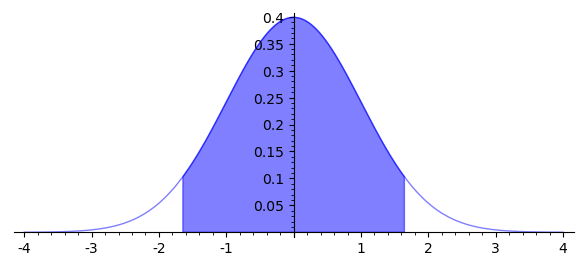

In [29]:
confianza = 0.9
p = (confianza + 1)/2
z = ces.qnorm(p)
print(z.n())
ces.dibujar_densidad(r=4,zi=-z, zf=z, rgbcolor='blue')

In [30]:
1 - ces.pnorm(1.64485)

0.050000374069078535

## 2.1.1. Intervalo de confianza para una proporción

De una población cuya proporción de "éxitos" $p$ es desconocida,
 extraemos una muestra aleatoria de tamaño $n$. Queremos determinar un intervalo de radio $c$ que contenga $p$ con confianza $a$.

Calcular la proporción de éxitos de la muestra, donde cada $X_i \sim B(p)$, o sea toman valor 1 con probabilidad $p$, según una distribución Bernoulli. La proporción de éxitos es:

\begin{equation*}
 \hat{p} = \frac{X_1 + X_2 +\ldots+ X_n}{n}.
\end{equation*}

Para estimar la desviación estándar de éxitos de la muestra, para la distribución Bernoulli, conocido el valor estimado de la proporción de la muestra: $\hat{p}$, obtenemos el valor estimado de la varianza de la $\hat{\sigma^2} = \hat{p}(1-\hat{p})$.

La desviación estándar de la proporción de la muestra es:

\begin{equation*}
\tilde{\sigma} = \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}.
\end{equation*}

$a = \mathbb{P}(-z_a < Z <= z_a) = 2 N(z_a) - 1$

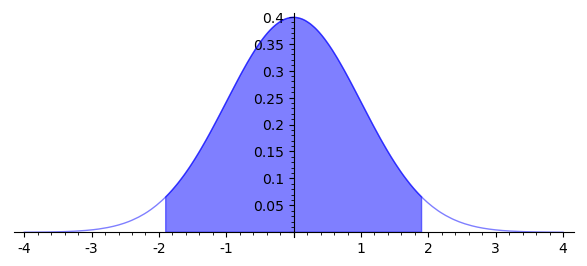

In [31]:
z_a = 1.9
ces.dibujar_densidad(r=4,zi=-z_a,zf= z_a, rgbcolor='blue')

\begin{align*}
    a &= N(z_a) - N(-z_a)\\
    1 &= N(z_a) + N(-z_a),
\end{align*}

entonces:

\begin{align*}
    N(z_a) &= \frac{a+1}{2}\\
    N(-z_a) &= \frac{1-a}{2}.
\end{align*}

\begin{equation*}
Z = \frac{X-p}{\tilde{\sigma}},
\end{equation*}

\begin{equation*}
p - z_a \tilde{\sigma} < X <= p + z_a \tilde{\sigma}
\end{equation*},

\begin{equation*}
c = z_a * \tilde{\sigma}
\end{equation*},

y el intervalo de confianza:

\begin{equation*}
(\hat{p} - c, \hat{p} + c).
\end{equation*}






### Ejemplo 2.1.1.

En una encuesta realizada a $100$ votantes seleccionados aleatoriamente, $35$ apoyan la iniciativa A. Estimar la proporción de apoyo a la iniciativa A para la población y el intervalo de confianza para $a = 0.95$.

Debido a la simetría, a partir de la confianza podemos estimar cualquiera de los cuantiles normales, como se muestra en la figuras.

Una vez conocidos los cuantiles, el radio del intervalo es $z \tilde{\sigma}$.

In [32]:
n = 100
prop = 35/100
mostrar_decimal(prop, 'prop = ')
confianza = 0.95
mostrar_decimal(confianza, 'confianza = ')
s = sqrt(prop*(1-prop)/n)
mostrar_decimal(s, 's = ')
z2 = ces.qnorm((confianza+1)/2)
mostrar_decimal(z2, 'z2 = ')

prop = 0.350
confianza = 0.950
s = 0.048
z2 = 1.960


In [33]:
z1 = ces.qnorm((1-confianza)/2)
mostrar_decimal(z1, 'z1 = ')

z1 = -1.960


0.0250


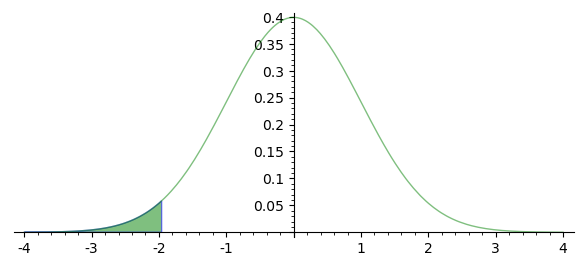

In [34]:
z1 = -1.96
p = ces.pnorm(z1)
print(p.n(digits=3))
ces.dibujar_densidad(r=4, zi=-4,zf=z1, rgbcolor='green',complemento=False)

0.975


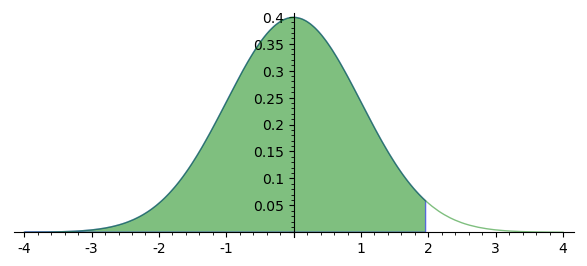

In [35]:
z2 = 1.96
p = ces.pnorm(z2)
print(p.n(digits=3))
ces.dibujar_densidad(r=4,zi=-4,zf=z2, rgbcolor='green',complemento=False)

In [36]:
c = z*s
mostrar_decimal(c, 'c = ')
inf_ic = prop-c
sup_ic = prop+c
mostrar_decimal(inf_ic,'inf_ic = ', '{:3.2f}')
mostrar_decimal(sup_ic,'sup_ic = ', '{:3.2f}')

c = 0.078
inf_ic = 0.27
sup_ic = 0.43


In [38]:
ces.obtener_ic_proporcion(tam=100,confianza=0.95,prop=35/100)

'(0.26, 0.44)'

In [39]:
Pc = 0.9
zi = ces.qnorm((1-Pc)/2);zi

-1.6448536269514726

### Ejemplo 2.1.2.

Encontrar el intervalo de confianza para $0.99$.

In [40]:
n = 100
prop = 35/100
s = sqrt(prop*(1-prop)/n)
mostrar_decimal(s, 's = ')

confianza = 0.99
mostrar_decimal(confianza, 'confianza = ')

z1 = ces.qnorm((1-confianza)/2)
mostrar_decimal(z1, 'z1 = ')

z2 = ces.qnorm((confianza+1)/2)
mostrar_decimal(z2, 'z2 = ')

z = z2
mostrar_decimal(z, 'z = -z1 = z2 = ')

s = 0.048
confianza = 0.990
z1 = -2.576
z2 = 2.576
z = -z1 = z2 = 2.576


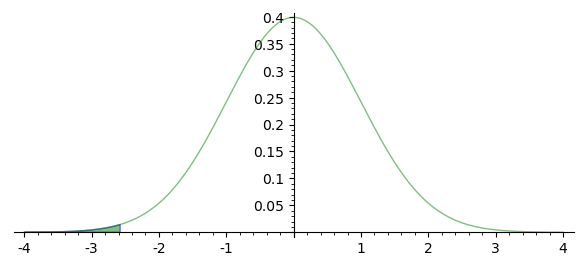

In [41]:
ces.dibujar_densidad(r=4, zi=-4,zf=z1, rgbcolor='green',complemento=False)

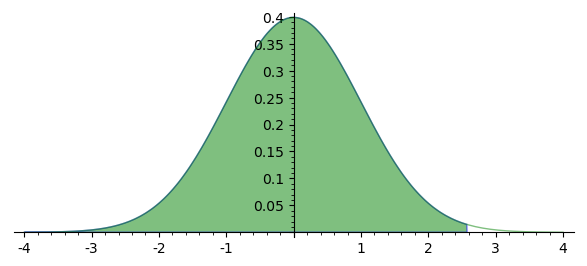

In [42]:
ces.dibujar_densidad(r=4, zi=-4,zf=z2, rgbcolor='green',complemento=False)

In [43]:
r = z*s
mostrar_decimal(r, 'radio del intervalo de confianza = ')

radio del intervalo de confianza = 0.123


In [44]:
((prop-r).n(digits=2), (prop+r).n(digits=2))

(0.23, 0.47)

In [46]:
ces.obtener_ic_proporcion(tam=100,confianza=0.99,prop=35/100)

'(0.23, 0.47)'

### Ejemplo 2.1.3. Obtener el tamaño de una muestra para la para una proporción.

Dados el radio del intervalo de confianza $c$ y la confianza, puede obtenerse $z$, para una proporción $p$ de la población se cumple:

\begin{equation*}
\frac{c^2}{z^2} = \frac{p (1 - p)}{n},
\end{equation*}

y resulta:
\begin{equation*}
n = \frac{p (1 - p)}{\frac{c^2}{z^2}}.
\end{equation*}

Como la proporción de la población un promedio está siempre entre cero y uno, $p (1 - p) \le 1/4$.

Por lo tanto,
\begin{equation*}
n \le \frac{z^2}{4 c^2},
\end{equation*}

tendremos un tamaño de la muestra adecuado para cualquier valor posible de la proporción real de la población.

A continuación, calculamos el tamaño de muestra para estimar la proporción
de una población con precisión $0.01$ y confianza $0.95$.


In [47]:
z = ces.qnorm(1.95/2)
c = 0.01
n = z^2/(4 * c^2)
n.ceil()

9604

In [49]:
ces.obtener_amplitud_muestra_proporcion(radio_ic=0.01, confianza=0.95)

9604

## 2.1.2 Intervalo de confianza para un promedio

In [50]:
n = 500
prom = 562
confianza = 0.90
sigma = 112
s = sigma/sqrt(n)
mostrar_decimal(s, 's = ')
z = ces.qnorm((1+confianza)/2)
mostrar_decimal(z, 'z = ')
c = z*s
mostrar_decimal(c, 'c = ')

inf_ic = prom-c
sup_ic = prom+c
mostrar_decimal(inf_ic,'inf_ic = ', '{:3.0f}')
mostrar_decimal(sup_ic,'sup_ic = ', '{:3.0f}')

ces.obtener_ic_promedio(tam=500,confianza=0.90,prom=562,s=112)

s = 5.009
z = 1.645
c = 8.239
inf_ic = 554
sup_ic = 570


'(554, 570)'

In [51]:
ces.obtener_ic_promedio(tam=500,confianza=0.95,prom=562,s=112)

'(552, 572)'

## 2.1.3 Intervalo de confianza para una diferencia de proporciones.

De dos muestras independientes $n_1$ y $n_2$ de una población grande, con proporciones $p_1$ y $p_2$ respectivamente, desconocidas. Para $n_1$ y $n_2$ grandes, 
el intervalo $(\hat{p_1}-\hat{p_2}-c, \hat{p_1}-\hat{p_2}+c)$, donde $c$ es el radio de confianza para la confianza $a$.

Esto se debe a que al ser independientes la varianza es la suma de las varianzas de cada una.

$c = z_a \sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1} + \frac{\hat{p_2}(1-\hat{p_2})}{n_2} }$

### Ejemplo 2.1.4.

In [52]:
p1 = 35/100
n1 = 100
p2 = 50/200
n2 = 200
x = p1 - p2
var = p1 * (1-p1)/n1 + p2 * (1-p2)/n2
sdm = sqrt(var)
confianza = 0.9
prob = (1+confianza)/2
z = ces.qnorm(prob)
c = z * sdm
(x-c.n(digits=1), x+c.n(digits=1))


(0.0068, 0.19)

In [53]:
ces.obtener_ic_dif_proporciones(confianza=0.9,
                               tam1=100,
                               prop1=35/100,
                               tam2=200,
                               prop2=50/200,
                               fmt=':3.2f')

'(0.01, 0.19)'

## 2.1.4. Intervalo de confianza para la diferencia de promedios.

De dos muestras independientes $n_1$ y $n_2$ de una población grande, con promedios $p_1$ y $p_2$ respectivamente, desconocidas. Para $n_1$ y $n_2$ grandes, el intervalo es $(\hat{p_1}-\hat{p_2}-c, \hat{p_1}-\hat{p_2}+c)$, donde $\hat{p_1}$ y $\hat{p_2}$
son los promedios de cada muestra y $S_1$ y $S_2$ son las desviaciones estándar de cada muestra. 

$\hat{\sigma_1}$ es la desviación estándar del promedio de la primera muestra.

Donde $c$ es el radio de confianza para la confianza $a$.

$P(|Z| < z_a) = a$

Esto se debe a que al ser independientes la varianza es la suma de las varianzas de cada una.
\begin{align}
\hat{\sigma_1^2} &= S_1^2/n_1,\\
\hat{\sigma_2^2} &= S_2^2/n_1,\\
\hat{\sigma^2} &= \hat{\sigma_1^2} + \hat{\sigma_2^2},\\
\hat{\sigma} &= \sqrt{\hat{\sigma^2}},\\
c &= z_a \hat{\sigma}.
\end{align}



### Ejemplo 2.1.5.

In [95]:
x1 = 562
n1 = 500
var1 = 112^2
x2 = 551
n2 = 300
var2 = 121^2
x = x1 - x2
var = var1/n1 + var2/n2
sdm = sqrt(var)
confianza = 0.95
prob = (1+confianza)/2
z = ces.qnorm(prob)
c = z * sdm
((x - c).n(), (x +c).n())

(-5.84786378761958, 27.8478637876196)

In [96]:
ces.obtener_ic_dif_promedios(confianza=0.95,
                             tam1 = 500,
                             prom1 = 562,
                             s1 = 112,
                             tam2 = 300,
                             prom2 = 551,
                             s2 = 121,
                             fmt = ':3.2f')


'(-5.85, 27.85)'

# 2.2. Verificación de hipótesis

El escenario de la verificación de hipótesis es
similar a la de un juicio. Aquí la hipótesis nula
es la que se asume cierta hasta que se demuestre
lo contrario, es decir, es la hipótesis
conservadora y se denomina hipótesis nula. Para
que sea cierta la hipótesis alternativa, debe
existir suficiente información como para poder
rechazar la validez de la hipótesis nula. Esto es
en analogía a que el acusado es inocente hasta que
se demuestre lo contrario. Se considera a la
hipótesis nula válida hasta que se demuestre lo
contrario. Por eso solo se rechaza si la evidencia
es suficiente como para que la probabilidad de su
validez sea muy pequeña a la luz de la evidencia
aportada.

Notamos $\mu_a$ a la cota para $\mu$ declarada en
la hipótesis alternativa.  Puede ser entonces
$\mu_a < \widehat{\mu}$, o $\mu_a >
\widehat{\mu}$.  Siempre la hipótesis alternativa
debería confirmar la evidencia, porque si la
evidencia está en su contra, automáticamente la
hipótesis nula queda vigente. Esto reduce el
análisis a solo dos casos.

En la verificación de hipótesis, se puede encarar
el problema desde dos perspectivas, que pueden
ayudar a comprender mejor el problema. La primera,
 indicada en el libro de Schinazi,
considera el apartamiento del promedio de la
muestra $\widehat{\mu}$ centrado en la cota del
promedio de la hipótesis alternativa $\mu_a$. 

La otra perspectiva considera, análogamente al caso de la
determinación de intervalos de confianza, el
apartamiento de $\mu_a$ centrado en
$\widehat{\mu}$.

### Caso $\widehat{\mu} < \mu_a$.

1) Solo cabe dudar si $\mu_a$ es una cota inferior
   que la hipótesis alternativa sostiene para el
   promedio $\mu$: $\widehat{\mu} < \mu_a < \mu$.
   Por lo tanto, para rechazar la hipótesis nula,
   la  probabilidad
    \begin{equation*}
    \mathbb{P}(\frac{X-\mu_a }
        {\widetilde{\sigma}} 
        <
        \frac{\widehat{\mu}-\mu_a }
        {\widetilde{\sigma}}
    ) = P,
    \end{equation*}
    para P suficientemente bajo, indica que es
    muy poco probable que $\mu = \mu_a$, y
    por tanto, es evidencia a favor
    del rechazo de la hipótesis nula.

2) Desde la perspectiva de los intervalos de
    confianza, la idea es centrar el problema
    en $\widehat{\mu}$, y así:    
    \begin{equation*}
    \mathbb{P}(
        \frac{\mu-\widehat{\mu}}
        {\widetilde{\sigma}}
        >
        \frac{\mu_a-\widehat{\mu}}
        {\widetilde{\sigma}}
    ) = P,
    \end{equation*}
    para P suficientemente bajo, indica que la
    probabilidad de $\mu_a = \mu$, está por
    debajo del límite para sostener la
    hipótesis nula, y la evidencia es
    suficiente para rechazarla.


### Caso $\mu_a < \widehat{\mu}$.

1) Solo cabe
    dudar si $\mu_a$ es una cota superior que
    la hipótesis alternativa sostiene para el
    promedio $\mu$: $\mu < \mu_a < \widehat{\mu}$.
    Por lo tanto, para rechazar la hipótesis
    nula, la probabilidad
    \begin{equation*}
    \mathbb{P}(
        \frac{X-\mu_a}
        {\widetilde{\sigma}} 
        >
        \frac{\widehat{\mu}-\mu_a}
        {\widetilde{\sigma}}
    ) = P,
    \end{equation*}
    para P suficientemente bajo, indica que es
    muy poco probable que $\mu = \mu_a$, y
    por tanto, es una fuerte evidencia a favor
    del rechazo de la hipótesis nula.

2) Desde la perspectiva de los intervalos de
    confianza, la idea es centrar el problema
    en $\widehat{\mu}$, y así
    \begin{equation*}
    \mathbb{P}(
        \frac{\mu-\widehat{\mu}}
        {\widetilde{\sigma}}
        <
        \frac{\mu_a-\widehat{\mu}}
        {\widetilde{\sigma}}
    ) = P,
    \end{equation*}
    para P suficientemente bajo, indica que la
    probabilidad de $\mu_a = \mu$, está por
    debajo del límite para sostener la
    hipótesis nula, y la evidencia es
    suficiente para rechazarla.

## 2.2.1. Verificación de proporción

### Ejemplo 2.2.1.

Si un proveedor argumenta que produce menos de $5$ por
ciento de fallas. En una prueba de $100$ elementos se
encuentran $4$ defectuosos.

Es decir, el proveedor afirma que la proporción de
fallas que caracteriza a su producción, es menor a $p =
0.05.$

Al realizar la prueba de verificación obtuvimos
$\widehat{p}=0.04.$

$p$ es un parámetro desconocido pero fijo, y
$\widehat{p}$ es conocido pero que varía aleatoriamente
con cada muestra que tomemos. Como el tamaño de las
muestras es $100 > 25$, sabemos que sea el valor que
tome $p$, los valores de las proporciones $\widehat{p}$
de las muestras variarán entorno a $p$ con una
distribución aproximadamente normal, con promedio $p$ y
varianza:
\begin{equation*}
\sigma^2 = \frac{p(1-p)}{n},
\end{equation*}
ya que las fallas y éxitos corresponden a una distribución
Bernoulli.

El proveedor afirma que $p < 0.05$, por lo que no cumple si
$p=0.05$, como es posible verificar que si el proveedor
declarase un límite de fallas mayor aceptable, aumentan sus
probabilidades de que la verificación resulte a su favor. Por lo tanto, como la intención no es favorecerlo en el planteo del test, la prueba más difícil que debería pasar el proveedor, es que asumamos que $p=0.05$.

\begin{align*}
\sigma &= \sqrt{\frac{p \times (1-p)}{n}}= \text{ , y } \\
z_a &= \frac{\widehat{p} - p}{\sigma}.
\end{align*}

Obtenemos $z_a = -0.46$ a la que corresponde una probabilidad $0.32$.


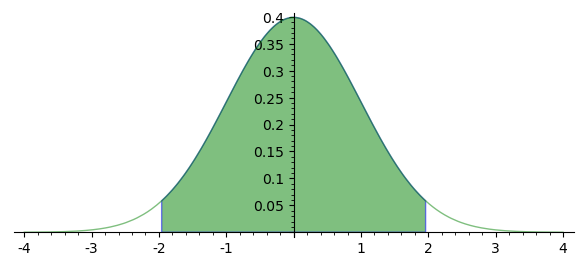

In [97]:
P_1 = ces.dibujar_densidad(r=4,zl=-4,zi=-z, zf=z,zr=4,
                                rgbcolor='green')
show(P_1)

In [98]:
p = 0.05
p_s = 0.04
n = 100
s = sqrt(p*(1-p)/n)
z = (p_s - p)/s
print(z)
N_z = ces.pnorm(z)
print(N_z)

-0.458831467741124
0.323177597769745


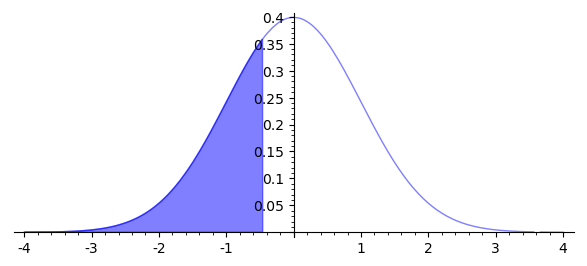

In [99]:
ces.dibujar_densidad(r=4, zi=-4,zf=z, rgbcolor='blue')

### Ejemplo 2.2.2

En este caso un empresario afirma que sus clientes cubren más del
$10$ por ciento del mercado. En una encuesta entre $1000$
clientes tomada al azar, $121$ de ellos fueron sus clientes.

Razonando de forma análoga al caso anterior, un $10$ por ciento
sería insuficiente, y la diferencia a considerar es
\begin{align*}
    \widehat{p} - p &= 0.021,\\
    \sigma &= 0.00948,
\end{align*}
y el valor $z$ correspondiente es $2.214$.
La probabilidad entonces es $0.013$, menor por tanto al $0.05$ necesario para
sostener nuestra $H_0$, de que el empresario podría estar
equivocado.


In [59]:
p = 0.10
p_s = 0.121
n = 1000
s = sqrt(p*(1-p)/n)
z = (p_s- p)/s
print(z)
N_z = ces.pnorm(z)
print(1-N_z)

2.21359436211786
0.013428347753762226


Como $P=0.0134 < 0.05$, al nivel 5% es suficiente evidencia estadística de $H_a$, rechazamos $H_0$. 

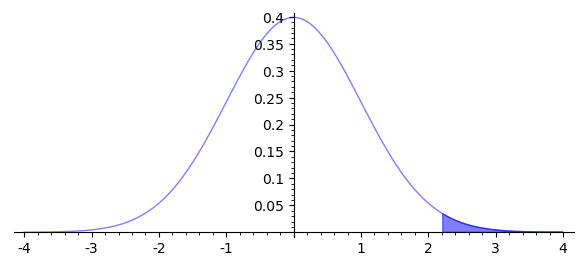

In [60]:
ces.dibujar_densidad(r=4, zi=z, zf=4, rgbcolor='blue')

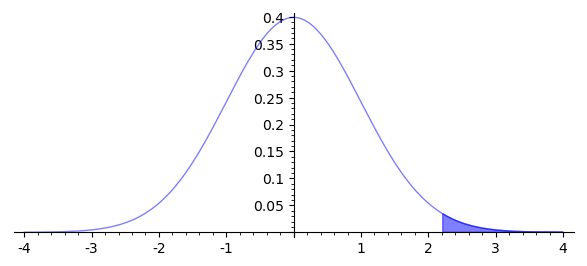

In [61]:
ces.dibujar_densidad(tipod=('gaussian',1),
                     r=4, zl=-4, zi=z, zf=4,zr=4,
                     alpha=0.5,
                     rgbcolor='blue', edgecolor='blue',
                     thickness=1,
                     legend_label='', legend_color='blue',
                     aspect_ratio=8, 
                     fill=True,
                     complemento=False)     

In [100]:
dp = 0.121 - 0.1;
s = sqrt(0.1*0.9/1000);
dz = dp/s;
print(dp.n(digits=3))
print(s.n(digits=3))
print(dz.n(digits=3))

0.0210
0.00949
2.21


In [101]:
p = 1 - ces.pnorm(dz)
p.n(digits=3)

0.0134

### Ejemplo

Si los pesos de 5 niños de 9 años son 25.0,28,24,26,24, tomados de cierta población, encontrar el intervalo de confianza para el peso medio de los niños de 9 años de dicha población.

In [103]:
confianza=0.9
pesos = [25.0,28,24,26,24]
n = len(pesos)
m=mean(pesos)
sdm = std(pesos)/sqrt(n)
print(sdm.n())

z1 = r.qt(0.95, df=4)
print(z1)
# z1 = r.qt(0.5, df=4); z1

z = ces.qt((1+confianza)/2, 4)
print(z.n())

c = RDF(z*sdm)

print((m-c, m+c))

0.748331477354788
[1] 2.131847
2.13184678632665
(23.8046719448941, 26.9953280551059)


### Ejemplos de cálculos de distribuciones en SageMath y R


In [104]:
T = RealDistribution('t',4)

In [105]:
T.cum_distribution_function_inv(1.9/2)

2.1318467863266504

In [106]:
ces.qt(1.9/2,4)

2.1318467863266504

In [107]:
ces.qnorm(1.9/2)

1.6448536269514715

In [108]:
C = RealDistribution('chisquared',1)

In [109]:
C.cum_distribution_function_inv(1.9/2)

3.841458820694123

In [110]:
r.qchisq(1.9/2,df=1)

[1] 3.841459

In [111]:
ces.qchisq(1.9/2,1)

3.841458820694123

In [112]:
r.pchisq(3.84146,1)

[1] 0.95

In [113]:
ces.pchisq(3.84146,1)

0.9500000351662526

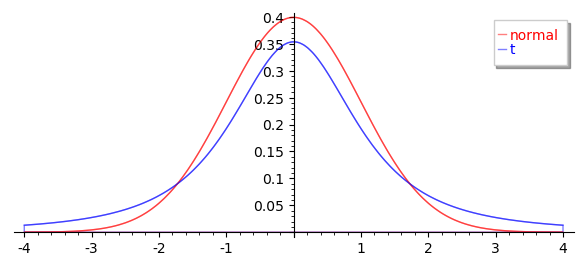

In [114]:
plot_n = ces.dibujar_densidad(rgbcolor='red', fill=False, legend_color='red',legend_label='normal')
plot_t = ces.dibujar_densidad(tipod=('t',2),r=6, rgbcolor='blue',fill=False, legend_color='blue', legend_label='t')
plots = plot_n + plot_t
show(plots)

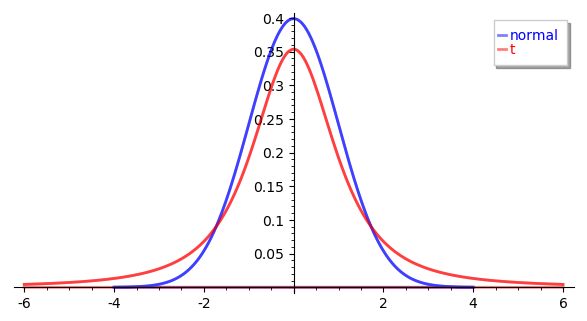

In [115]:
plot_n = ces.dibujar_densidad(tipod=('gaussian',1),
                               r=5, zl=-4, zr=4,
                               alpha=0.5,
                              rgbcolor='blue', edgecolor='blue',
                              thickness=2,
                              legend_label='normal',legend_color='blue',
                              aspect_ratio=15, fill=False,
                              complemento=False
                             )

plot_t = ces.dibujar_densidad(tipod=('t',2),
                              r=6, zl=-6, zr=6,
                              alpha=0.5,
                              rgbcolor='red', edgecolor='red',
                              thickness=2,
                              legend_label='t', legend_color='red',
                              aspect_ratio=15, fill=False,
                              complemento=False
                             )                              
plots = plot_n + plot_t
show(plots)

## Intervalo de confianza del promedio para pequeñas muestras, asumiendo distribución normal de los promedios

### Ejemplo

Si los pesos de 5 niños de 9 años son 25.0,28,24,26,24, tomados de cierta población, encontrar el intervalo de confianza para el peso medio de los niños de 9 años de dicha población.

In [94]:
confianza=0.9
pesos = [25.0,28,24,26,24]
n = len(pesos)
m=mean(pesos)
sdm = std(pesos)/sqrt(n)
print(sdm.n())

z1 = r.qt((1+confianza)/2, df=4);z1
# z1 = r.qt(0.5, df=4); z1

z = ces.qt((1+confianza)/2, 4)
print(z.n())

c = RDF(z*sdm)

print((m-c, m+c))

0.748331477354788
2.13184678632665
(23.8046719448941, 26.9953280551059)


## Verificación de hipótesis del promedio para pequeñas muestras, asumiendo distribución normal de los promedios

### (Ejemplo 2.3.3)

Un proveedor afirma que una medicación brinda más de $3$ horas de alivio.

### Verificación.

Se prueba el efecto con una muestra de $6$ pacientes. El promedio de tiempo de alivio es $200$ min y la desviación estándar es $40$ min.

\begin{equation*}
    Planteo
    \begin{cases}
        H_0 & : \mu = 180, \\
        H_a & : \mu > 180.
    \end{cases}
\end{equation*}

Para calcular el valor $P$ en este caso:

\begin{equation*}
    \tilde{\sigma} = \frac {S} { \sqrt{n} }
\end{equation*}


In [17]:
sdm = 40/sqrt(6)
print(sdm.n())

16.3299316185545


\begin{align*}
    P &= \mathbb{P}(\frac{ \bar{X} - 180 }{\tilde{\sigma}} > \frac {200 - 180} {\tilde{\sigma}} ),
    \text{ donde} \\
    &\frac{ \bar{X} - 180 }{\tilde{\sigma}} \sim t(5).
\end{align*}

Entonces,
\begin{equation*}
    P = \mathbb{P}( t(5) > 20/\tilde{\sigma} )
\end{equation*}


In [116]:
t2 = 20/sdm
print(t2.n())
P = 1-ces.pt(t2, 5)
print(P.n(digits=3))

26.7261241912424
6.86e-7


In [117]:
t1 = -20/sdm
P1 = ces.pt(t1,5)
print(P)

6.856484736639246e-07


A un nivel de 5%, la evidencia para $H_a$: $P = 0.138$, es insuficiente para rechazar $H_0$.

In [118]:
1-ces.pt(1.22,5)

0.1384319056707699

In [119]:
s = 4.3/sqrt(10)
print(s.n())
t1 = -2.4/s
print(t1.n())
ces.pt(t1,9)

1.35977939387240
-1.76499218241956


0.055691278698884794

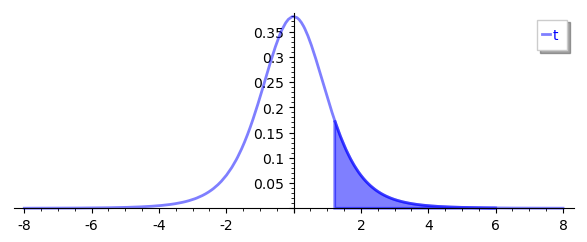

In [120]:
ces.dibujar_densidad(tipod=('t',5),
                     r=6, zl=-8,zi=1.22, zf=6, zr=8,
                     alpha=0.5,
                     rgbcolor='blue', edgecolor='blue',
                     thickness=2,
                     legend_label='t', legend_color='blue',
                     aspect_ratio=15, 
                     fill=True,
                     complemento=False)                              

In [121]:
47*35/200.n()

8.22500000000000

## 2.4. Aplicación de la distribución Chi cuadrado.

### 2.4.1. Verificación de independencia entre dos características de la población

### Ejemplo 2.4.1.

In [122]:
def ec(tabla, fila, columna):
    tf, tc = 0,0
    for j in range(tabla.ncols()):
        tf += tabla[fila,j]
    for i in range(tabla.nrows()):
        tc += tabla[i,columna]
    return(tf*tc)

def ex(tabla):
    to=0
    E=matrix(QQ,tabla.nrows(), tabla.ncols())
    for i in range(tabla.nrows()):
        for j in range(tabla.ncols()):
            to += tabla[i,j]
    for fila in range(tabla.nrows()):
        for columna in range(tabla.ncols()):
            E[fila,columna] = ec(tabla, fila, columna)/to
    return E

def Xsq(O):
    E = ex(O)
    sum=0
    for i in range(O.nrows()):
        for j in range(O.ncols()):
            sum += (O[i,j]-E[i,j])^2/E[i,j]
    return(sum)

In [123]:
O = matrix(QQ,[[9,38],[21,80],[5,47]])
print(O)
# print(O.nrows(),O.ncols())
total = sum(sum(O))
# print(total)

[ 9 38]
[21 80]
[ 5 47]


In [124]:
E = ex(O)
print(E)

[ 329/40 1551/40]
[ 707/40 3333/40]
[  91/10  429/10]


In [125]:
x = Xsq(O)
print(x.n())
P = 1 - ces.pchisq(x.n(), df=2)
print(P)

3.08578437923287
0.21376196639100808


In [126]:
H_0=P > 0.05
print(H_0)

True


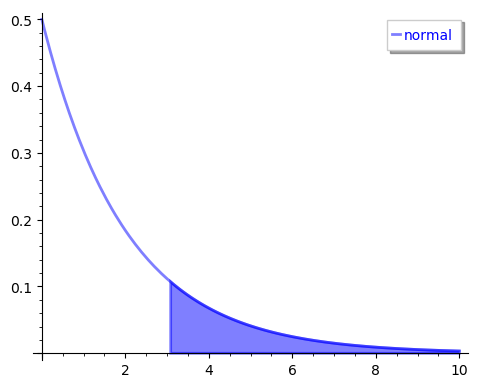

In [127]:
plotchi1 = ces.dibujar_densidad(tipod=('chisquared',2),
                               r=4, zl=0,zi=x, zr=10,
                               alpha=0.5,
                              rgbcolor='blue', edgecolor='blue',
                              thickness=2,
                              legend_label='normal',legend_color='blue',
                              aspect_ratio=16, fill=True,
                              complemento=False
                             )
show(plotchi1)

# Distribuciones de Probabilidad
## Distribución general

In [128]:
P = [0.3, 0.4, 0.3]
X = GeneralDiscreteDistribution(P)
# X.set_seed(1)

In [129]:
lx = [X.get_random_element() for i in range(20)]
print(lx)
cuentas = [0]*len(P)
nr_muestras=10000
for i in range(nr_muestras):
    cuentas[X.get_random_element()] += 1
print(cuentas)
[1.0*x/nr_muestras for x in cuentas]

[1, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1]
[3024, 3908, 3068]


[0.302400000000000, 0.390800000000000, 0.306800000000000]

[0.2405, 0.0, 0.2296666666666667, 0.0, 0.8233333333333331, 0.0, 0.20583333333333328, 0.0, 0.22099999999999995, 0.0, 0.2231666666666666, 0.0, 0.2231666666666666]


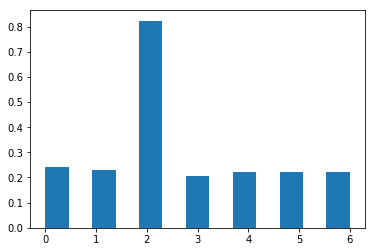

In [130]:
from sage.probability.probability_distribution import GeneralDiscreteDistribution
P = [0.1, 0.1, 0.3999, 0.1, 0.1, 0.1, 0.1001]
X = GeneralDiscreteDistribution(P)
h, b = X.generate_histogram_data(bins = 13)
print(h)  # rel tol 1e-08
# file = os.path.join(SAGE_TMP, "my_general_distribution_plot")
# X.generate_histogram_plot(file)


## Distribución uniforme

In [131]:
a = 0
b = 2
T = RealDistribution('uniform', [a, b])
T.get_random_element()

print(T.distribution_function(0))

print(T.cum_distribution_function(1))

print(T.cum_distribution_function_inv(.5))


0.5
0.5
1.0


In [132]:
binomial(4,2)

6

### R binomial distribution

dbinom(x, size, prob, log = FALSE)

pbinom(q, size, prob, lower.tail = TRUE, log.p = FALSE)

qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)

rbinom(n, size, prob)

In [136]:
sqrt(5/4).n()

1.11803398874989

In [137]:
sqrt(0.5*0.5/5)

0.223606797749979

In [138]:
sqrt(0.97*0.03/10)

0.0539444158370447

In [139]:
%r b <- rbinom(n=100,size=5,prob=0.5)

%r print(b)

  [1]
 3
 2
 2
 1
 3
 3
 4
 3
 3
 1
 2
 2
 0
 2
 2
 3
 3
 4
 4
 2
 4
 3
 3
 2
 3
 1
 2
 2
 2
 2
 1
 2
 4
 2
 3
 2
 1


 [38]
 4
 4
 3
 3
 1
 2
 4
 3
 2
 3
 1
 3
 2
 2
 1
 2
 2
 2
 1
 2
 3
 3
 2
 2
 3
 2
 2
 1
 3
 2
 2
 2
 2
 3
 1
 3
 3


 [75]
 3
 2
 1
 3
 4
 2
 3
 2
 3
 2
 3
 3
 2
 2
 2
 3
 4
 0
 1
 2
 4
 3
 3
 2
 1
 3




  [1] 3 2 2 1 3 3 4 3 3 1 2 2 0 2 2 3 3 4 4 2 4 3 3 2 3 1 2 2 2 2 1 2 4 2 3 2 1
 [38] 4 4 3 3 1 2 4 3 2 3 1 3 2 2 1 2 2 2 1 2 3 3 2 2 3 2 2 1 3 2 2 2 2 3 1 3 3
 [75] 3 2 1 3 4 2 3 2 3 2 3 3 2 2 2 3 4 0 1 2 4 3 3 2 1 3

In [140]:
list(range(46,55))

[46, 47, 48, 49, 50, 51, 52, 53, 54]

In [141]:
# Evaluar P(45 < X < 55) para X Binomial(100,0.5)
sum(r.dbinom(list(range(46,55)), 100, 0.5))

[1] 0.6317984

In [142]:
r.pbinom(54,100,0.5) - r.pbinom(45,100,0.5)

[1] 0.6317984

### Verificando la distribución de las muestras

In [143]:
P = [0.3, 0.4, 0.3]
cuentas = [0] * len(P)
X = GeneralDiscreteDistribution(P)
nr_muestras = 10000
for _ in range(nr_muestras):
    cuentas[X.get_random_element()] += 1
[1.0*x/nr_muestras for x in cuentas]

[0.293600000000000, 0.408900000000000, 0.297500000000000]

La distribución de probabilidades es normalizada automáticamente:

In [144]:
P = [0.1, 0.3]
X = GeneralDiscreteDistribution(P, seed = 0)
cuentas = [0, 0]
for _ in range(10000):
    cuentas[X.get_random_element()] += 1
float(cuentas[1]/cuentas[0])

3.042037186742118

UTF-8 character examples:

In [145]:
print("\u2208", ", ", "\U0001d4ae")

∈ ,  𝒮
